In [1]:
import numpy as np
import sklearn
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
#Obtain Data

data_full = pd.read_csv('/Users/aminasaleh/Downloads/water_potability.csv')
data_full.shape

(3276, 10)

In [3]:
#Clean Up

data_full = data_full.dropna()
data_full.shape

(2011, 10)

In [4]:
#Create Training and Test Set

x = data_full.drop(columns = ['Potability']).copy()
y = data_full ['Potability']
scaler = MinMaxScaler()
X = scaler.fit_transform(data_full)
x_train, x_test, y_train, y_test = train_test_split (x,y,test_size = 0.2, random_state = 42)

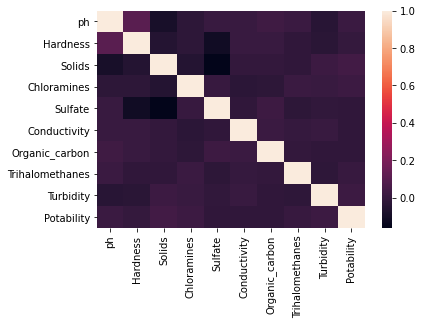

In [5]:
#Correlation Matrix

waterpot_hm = sns.heatmap(data_full.corr(), annot = False)

In [6]:
#Build the Model and fit

model = BaggingClassifier()
model.fit(x_train, y_train)

BaggingClassifier()

In [7]:
#Train the Model

predictions_train = model.predict(x_train)
predictions_test = model.predict(x_test)

[[193  38]
 [102  70]]
              precision    recall  f1-score   support

           0       0.65      0.84      0.73       231
           1       0.65      0.41      0.50       172

    accuracy                           0.65       403
   macro avg       0.65      0.62      0.62       403
weighted avg       0.65      0.65      0.63       403



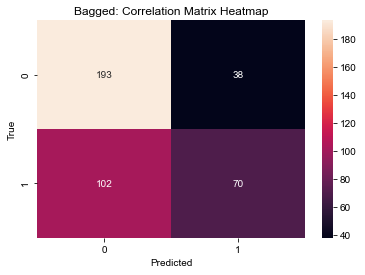

In [8]:
#Create Confusion Matrix

conf_mat = confusion_matrix(y_test, predictions_test)
heatmap = sns.heatmap(conf_mat, annot=True,fmt='.0f')

sns.set(font_scale=1.2)
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set(rc={'figure.figsize':(6,6)})
sns.set_palette("pastel")
plt.title('Bagged: Correlation Matrix Heatmap')

heatmap.set_xlabel('Predicted')
heatmap.set_ylabel('True')


print(metrics.confusion_matrix(y_test, predictions_test))
print(metrics.classification_report(y_test, predictions_test))

In [9]:
#Determine Accuracy 

print("Accuracy:",metrics.accuracy_score(y_train, predictions_train))
print("Accuracy:",metrics.accuracy_score(y_test, predictions_test))

Accuracy: 0.9819651741293532
Accuracy: 0.652605459057072
